# Supervised learning
**If you can't implement it, you don't understand it**

- topic covered: naive bayes, k nearest neighbors, perceptron, decision trees

## Dataset
- in this course we use the MNIST dataset available here: https://www.kaggle.com/c/digit-recognizer/overview
- it consists of images of handwritten digits
- inputs are a flattened vector of 28x28 pixels, no RGB so values are 0-255
- input will be scaled to 0-1
- targets are digits from 0 to 9
- 42 000 images in the training set, test set doesn't come with labels on kaggle, so we will only be using the training set

<img src="./assets/mnist.png"
     align="left"
     alt="Markdown Monster icon"
     style="float: left;" />

## K-Nearest neighbors

### Intuition
- both simple conceptually and easy to implement in code  
- sample problem:  
    - will a student pass a course given that we know how many hours they studied?
    - we have data about students from past semesters
    - we can find students who are "most similar"
    - similarity here is determined by the difference between how many hours they studied compared to other students
    - by finding the most similar students, we can estimate performance based on their result

| Name  | Hours studied  | Passed   |
|-------|---|---|
| Alice | 1 | N |
| Bob   | 3 | N |
| Carol | 6 | Y |
| David | 7 | Y |
| Eric  | 8 | Y |  



<img src="./assets/knn1.png"
     alt="alt text" 
     width="400" 
     height="400" 
     align="left">     

- using 2-nearest neighbours yields (Alice, Bob) who both failed, so the the prediction for the result would also be fail
- using 3-nearest neighbours yields (Alice, Bob, Carol) which now has 1 instance of pass, in this case we would still predict the majority results, ie. fail
- another possibility is to weigh the results based on distance 
- or to have a some other heuristic to break ties


### Concepts and implementation
- given a $k$, find the $k$ nearest neighbours and use them to determine the prediction
- finding the 1 nearest neighbour is simple:

#### 1NN implementation

In [1]:
def predict_nn(x_0):
    '''
    Given a single instance of input data, output the prediction
    '''
    closest_distance = inf
    closest_class = -1
    for x, y in training_data:
        d = dist(x, x_0)
        if d < closest_distance:
            closest_distance = d
            closest_class = y
    return closest_class

#### K-neareset neighbours

- keeping track of an arbitrary number of closest neighbours however is not so simple<br>
- for every datapoint $i$ we need to find their respective $k$ nearest neighbours<br>
example:
    - $k = 3$ and we have stored distances [1, 2, 3]
    - we encounter a point with distance 1.5, so we should replace the 3
    - assuming we have $n$ datapoints in total, we need to look at all of them to make their respective prediction $\implies O(n)$
    - furthermore for every datapoint there is a list of $k$ closest neighbours, which needs to be iterated over to see if a datapoint should be updated $\implies O(k)$
    - in total then $\implies O(kn)$
    - improvements in complexity over the naive approach can be made by using a sorted list to hold the $k$ nearest neighbours $\implies O(n\log{k})$
- knn is known as a lazy classifier - training consists only of storing data in memory, which is very fast, but predictions are slow<br>

#### KNN Implementation


Reading and transforming data...


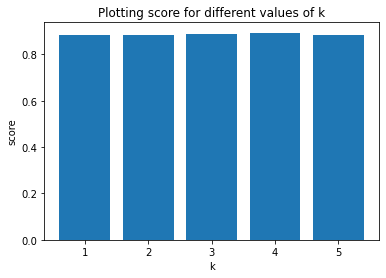

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils import get_data
from sortedcontainers import SortedList
from collections import defaultdict
# Note: can't use sorted dict, because the key is distance
# when more points have same distance, they would be overwritten

class KNN:
    
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y): 
        self.X = X
        self.y = y
        
    def predict(self, X_pred):
        y = np.zeros(len(X_pred))
        for i, x in enumerate(X_pred):
            sort_list = SortedList()
            for j, xt in enumerate(self.X):
                diff = x - xt
                d = diff.dot(diff)
                #d = np.linalg.norm(diff, axis=1)
                if len(sort_list) < self.k:
                    sort_list.add((d, self.y[j]))
                else:
                    if d < sort_list[-1][0]:
                        del(sort_list[-1])
                        sort_list.add((d, self.y[j]))
            votes = defaultdict(int)
            for _, v in sort_list:
                votes[v] += + 1
            max_votes = 0
            max_votes_class = -1
            for v, count in votes.items():
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
                    
        return y
    
    def score(self, X, Y):
        preds = self.predict(X)
        return np.mean(preds == Y)

# data prep
n_datapoints = 2000
X, Y = get_data(n_datapoints)
n_train = 1000
X_train, Y_train = X[:n_train], Y[:n_train]
X_test, Y_test = X[n_train:], Y[n_train:]

# running classifier for different k
k_range = 6
value_dict = {}
for k in range(1, k_range):
    classifier = KNN(k)
    classifier.fit(X_train, Y_train)
    score = classifier.score(X_test, Y_test)
    value_dict[k] = score
    
# plot results
fig, ax = plt.subplots()
ax.bar(value_dict.keys(), value_dict.values())
ax.set_xlabel('k')
ax.set_ylabel('score')
ax.set_title('Plotting score for different values of k')
plt.plot();

### How KNN can fail
- in a grid of alternating dots an odd number of neighbours will contain more instances of the opposite class
- the closest neighbour will be the datapoint itself
- we could circumvent this problem by using 1NN

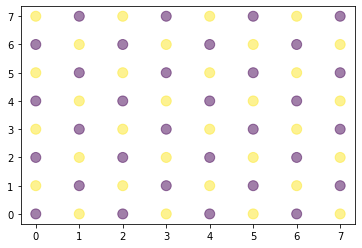

Model accuracy: 0.0


In [3]:
from utils import get_alternating_grid
# data prep - creating a grid of alternating dots
X, Y = get_alternating_grid()

# plot data
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

# train model
model = KNN(3)
model.fit(X, Y)
print(f"Model accuracy: {model.score(X, Y)}")

### XOR problem
- we've already demonstrated that KNN fails on the (extended) xor problem
- now we demonstrate that KNN can handle a dataset that is not linearly separable

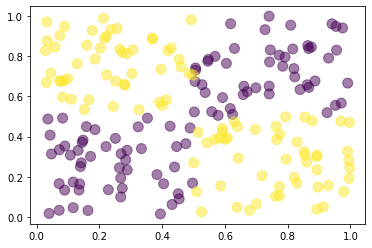

Model accuracy: 0.985


In [4]:
from utils import get_modified_xor

X, Y = get_modified_xor()
plt.scatter(X[:, 0], X[:, 1], s=100, c=Y, alpha=0.5)
plt.show()

model = KNN(3)
model.fit(X, Y)
print(f"Model accuracy: {model.score(X, Y)}")

### Donut problem
- KNN can also handle the donut problem, which is not linearly separable

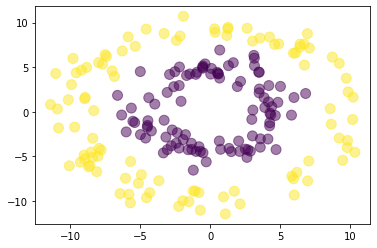

Model accuracy: 0.995


In [5]:
from utils import get_donut

X, Y = get_donut()
plt.scatter(X[:, 0], X[:, 1], s=100, c=Y, alpha=0.5)
plt.show()

model = KNN(3)
model.fit(X, Y)
print(f"Model accuracy: {model.score(X, Y)}")

### Effect of k
- small $k$ is more expressive
- large $k$ is simple/smooth
- the goal is to pick a $k$ such that the model generalizes as best as possible<br>
<img src="./assets/effects_of_k.png"
     alt="alt text" 
     width="600" 
     height="600" 
     align="left">     

### Efficiency improvements
- ideas for further improvements in complexity (TBD)

## Naive bayes and bayes classifiers

## Decision trees

### Intuition
- easy to understand, very difficult to implement
- essentially just a large grou of if statements<br>
<img src="./assets/dt_example.jpg"
     alt="alt text" 
     width="300" 
     height="300" 
     align="left"><br>
     

```
if hungry:
    if money >= 25:
        go_to_restaurant()
    else:
        buy_burger()
else:
    go_to_sleep()
```

- decision trees allow us to create decision boundaries as a combination of cuts in the input space<br>
<img src="./assets/dt_boundary.png"
     alt="alt text" 
     width="500" 
     height="500" 
     align="left"><br>
     

### Concepts
- though the concept is simple (only a series of if statements), implementation is complicated since it is difficult to autmate the process of finding the correct calues to make splits on
- each node corresponds to a split on a single input variable
- splits are always orthogonal to the input axis, so we can't place a decision boundary at an arbitrary angle
- by splitting multiple times however, we can construct highly non linear decision boundaries
- decision trees are inherently recursive, we use Node objects to handle the behaviour of each node


## Perceptrons

## Practical machine learning

### Hyperparameters and cross validation
- most alrogithms have hyperparameters we can tune, which in turn have affect on the learned model and its performance
- we strive to select hyperparameters such that the model's ability to generalize with high peroformance is maximized
- we usually use a validation set to determine how well different values for hyperparameters work
- one method of constructing such a validation set is k-fold cross validation

### K-fold cross validation
- we divide the train set into $k$ parts
- iterate $k$ times and in each loop hold out one of the $k$ parts
- use it as a validation set to determine the score
- as a result we get $k$ scores which we just average

### Feature extraction and feature selection
- the donut problem is not solvable by the perceptron, since it is not linearly separable
- however it is easily solvable if we use the inputs to calculate the radius, then is is easily solvable
- the morale is that we need to be very familiar with our data, aka domain knowledge<br><br>

- how to choose which inputs to use in the model?
- too many can lead to overfitting, we want to only use the ones with highest predictive power
- greedy method:
    - build a classifier with each individual features and determine the best one through cross validation
    - build another classified with the best selected feature and another one, determine the second best with same process
    - repeat
- or use some other dimensionality reduction technique such as PCA

### Multiclass classification
- some algorithms naturally support multiclass classification, such as KNN
- however even algorithms which only support binary classifiacation can be used for multiclass classification
- one vs rest, if we have $k$ classes, build $k$ binary classifiers to determine if a datapoint is from a given class and select output from model with highest score

### Scikit learn
- popular python ML library
- same scheme - fit(X, Y), predict(X, Y), score(X, Y)
- though scikit is likely the best choice for building ML models in practice, for educational purposes it is necessary to go into much more detail and implement the algorithms ourselves
- in scikit classes offer the posterior probability in case we are interested in this rather than the final prediction, clf.predict_proba(X)

### AUC
- area under the ROC curve, false positive rate (FPR) on x-axis and true positive rate (TPR) on the y-axis
- $FPR = \frac{FP}{FP+TN}$
- $TPR = \frac{TP}{TP+FN}$
- random guessing would yield an ROC of 0.5 and a perfect classifier would give an ROC of 1
- any threshold may be used to determine if we predict true or false, we don't need to always round from 0.5
- the ROC curve then plots various values of the threshold
- why would we care about different values of threshold? In certain situations having a very low false negative at the price of more false positives can be important, such as medical diagnoses
- AUC also provides a complementary evaluation metrics to accuracy
- sklearn.metrics.roc_auc_score(y_true, y_score)
- models can be saved and loaded using the pickle library

### Regression example with scikit
- using the weights parameter for KNN smooths out predictions a little bit
- as opposed to the decision tree, which produces a very blocky output

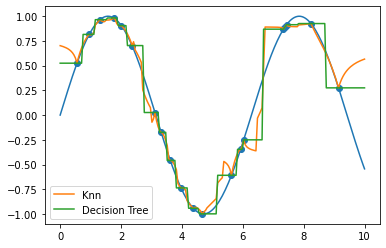

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

N = 200
X = np.linspace(0, 10, N).reshape(N, 1)
Y = np.sin(X)

Ntrain = 20
idx = np.random.choice(N, Ntrain)
Xtrain = X[idx]
Ytrain = Y[idx]

knn = KNeighborsRegressor(n_neighbors=3,weights='distance')
knn.fit(Xtrain,Ytrain)
Yknn = knn.predict(X)

dt = DecisionTreeRegressor()
dt.fit(Xtrain,Ytrain)
Ydt = dt.predict(X)

plt.scatter(Xtrain, Ytrain)
plt.plot(X, Y)
plt.plot(X, Yknn, label='Knn')
plt.plot(X, Ydt, label='Decision Tree')
plt.legend()
plt.show()

## Building a web service